<a href="https://colab.research.google.com/github/varshakarunya/sierra-atlantic-analytics-projects/blob/main/notebooks/01_retail_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Analytics Client – Exploratory Data Analysis (EDA)

## Phase 1: Exploratory Data Analysis

### Business Context
This project simulates a retail analytics consulting engagement for a large omnichannel retailer.
The objective of Phase 1 is to understand historical sales performance, customer behavior,
and operational patterns to identify key business drivers and potential improvement areas.

This phase focuses on:
- Understanding the structure and quality of the data
- Identifying trends, seasonality, and anomalies
- Generating hypotheses to guide modeling in Phase 2


## Objectives of Phase 1

- Explore sales and transaction-level data
- Analyze revenue trends over time
- Understand customer purchasing behavior
- Identify product-level performance patterns
- Surface initial business insights for stakeholders


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")

pd.set_option("display.max_columns", None)

## Data Loading

For this simulated engagement, we use a retail transactions dataset containing:
- Transaction date
- Product category
- Quantity sold
- Unit price
- Customer identifier

The dataset represents historical point-of-sale data.


In [2]:
# Simulated retail transaction data
data = {
    "transaction_date": pd.date_range(start="2023-01-01", periods=20, freq="D"),
    "product_category": [
        "Electronics", "Clothing", "Home", "Electronics", "Clothing",
        "Home", "Electronics", "Clothing", "Home", "Electronics",
        "Clothing", "Home", "Electronics", "Clothing", "Home",
        "Electronics", "Clothing", "Home", "Electronics", "Clothing"
    ],
    "quantity": np.random.randint(1, 5, 20),
    "unit_price": np.random.randint(20, 300, 20),
    "customer_id": np.random.randint(1000, 1050, 20)
}

df = pd.DataFrame(data)
df["revenue"] = df["quantity"] * df["unit_price"]

df.head()

,transaction_date,product_category,quantity,unit_price,customer_id,revenue
0,2023-01-01,Electronics,2,264,1021,528
1,2023-01-02,Clothing,3,272,1005,816
2,2023-01-03,Home,1,43,1015,43
3,2023-01-04,Electronics,4,214,1029,856
4,2023-01-05,Clothing,4,104,1008,416


## Data Overview

We begin by reviewing the structure of the dataset, data types, and summary statistics.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  20 non-null     datetime64[ns]
 1   product_category  20 non-null     object        
 2   quantity          20 non-null     int64         
 3   unit_price        20 non-null     int64         
 4   customer_id       20 non-null     int64         
 5   revenue           20 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ KB


In [4]:
df.describe()

,transaction_date,quantity,unit_price,customer_id,revenue
count,20,20.000000,20.00000,20.00000,20.000000
mean,2023-01-10 12:00:00,2.600000,153.35000,1025.00000,399.950000
min,2023-01-01 00:00:00,1.000000,21.00000,1002.00000,43.000000
25%,2023-01-05 18:00:00,1.000000,85.50000,1015.00000,165.250000
50%,2023-01-10 12:00:00,3.000000,152.50000,1025.50000,392.000000
75%,2023-01-15 06:00:00,4.000000,216.75000,1035.25000,624.750000
max,2023-01-20 00:00:00,4.000000,272.00000,1049.00000,856.000000
std,NaN,1.231174,80.14413,13.70363,271.597705


## Revenue Analysis

This section analyzes overall revenue patterns and identifies high-level performance trends.


In [5]:
total_revenue = df["revenue"].sum()
total_revenue

np.int64(7999)

In [6]:
revenue_by_category = (
    df.groupby("product_category")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category

,revenue
product_category,
Clothing,3212
Electronics,2987
Home,1800


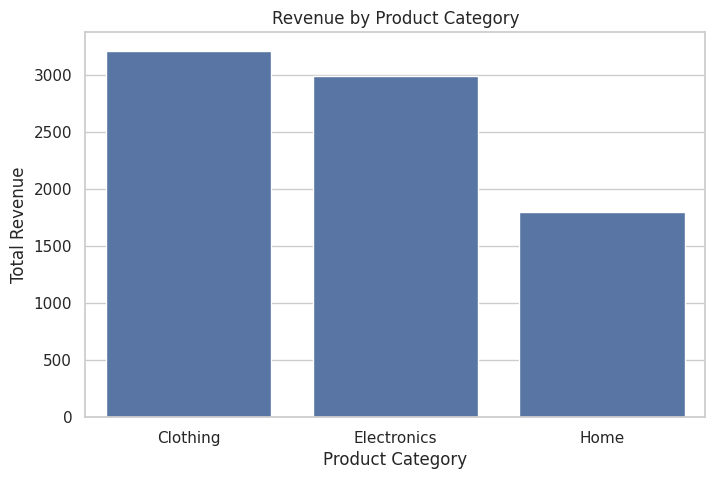

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=revenue_by_category.index,
    y=revenue_by_category.values
)
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

## Time-Based Sales Trends

Analyzing revenue trends over time helps identify seasonality, demand spikes,
and potential operational bottlenecks.

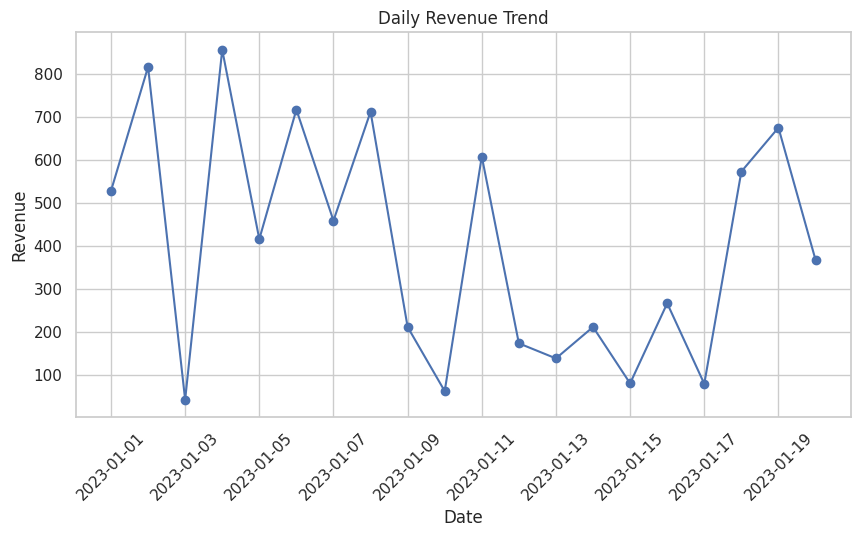

In [8]:
daily_revenue = df.groupby("transaction_date")["revenue"].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_revenue.index, daily_revenue.values, marker="o")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

## Customer Behavior Analysis

Understanding customer purchasing patterns helps inform segmentation,
loyalty strategies, and personalized marketing.


In [9]:
customer_revenue = (
    df.groupby("customer_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

customer_revenue.head()

,revenue
customer_id,
1034,1085
1008,989
1029,856
1039,851
1005,816


## Key Exploratory Insights

- Electronics contribute a significant portion of total revenue
- Revenue shows moderate daily variability, suggesting stable baseline demand
- A small subset of customers accounts for a disproportionate share of revenue
- Product category performance varies significantly, indicating optimization opportunities

These findings will guide feature engineering and predictive modeling in Phase 2.


## Next Steps (Phase 2)

In Phase 2, we will:
- Engineer time-based and customer-level features
- Build predictive models for sales forecasting
- Evaluate model performance using business-relevant metrics

Phase 2 will focus on translating insights into actionable forecasts.
